## The Spark Foundation - GRIP
### Data Science & Business Analytics

### Task 3:- Exploratory Data Analysis - Retail

### Importing Libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn
%matplotlib inline

### Loading our Dataset to work with

In [2]:
df=pd.read_csv("SampleSuperstore.csv")

### Exploring our dataset

In [3]:
#Total rows and columns in our data
print(df.shape)

(9994, 13)


In [4]:
#All column names along with their types
print(df.dtypes)

Ship Mode        object
Segment          object
Country          object
City             object
State            object
Postal Code       int64
Region           object
Category         object
Sub-Category     object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object


In [5]:
#Looking at first 5 rows in our dataframe 
print(df.head())

        Ship Mode    Segment        Country             City       State  \
0    Second Class   Consumer  United States        Henderson    Kentucky   
1    Second Class   Consumer  United States        Henderson    Kentucky   
2    Second Class  Corporate  United States      Los Angeles  California   
3  Standard Class   Consumer  United States  Fort Lauderdale     Florida   
4  Standard Class   Consumer  United States  Fort Lauderdale     Florida   

   Postal Code Region         Category Sub-Category     Sales  Quantity  \
0        42420  South        Furniture    Bookcases  261.9600         2   
1        42420  South        Furniture       Chairs  731.9400         3   
2        90036   West  Office Supplies       Labels   14.6200         2   
3        33311  South        Furniture       Tables  957.5775         5   
4        33311  South  Office Supplies      Storage   22.3680         2   

   Discount    Profit  
0      0.00   41.9136  
1      0.00  219.5820  
2      0.00    6.871

In [6]:
# Getting a concise summary 
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB
None


In [7]:
#Checking all columns for null values
print(df.isnull().sum())

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64


In [8]:
# To get some basic statistical details
print(df.describe())

        Postal Code         Sales     Quantity     Discount       Profit
count   9994.000000   9994.000000  9994.000000  9994.000000  9994.000000
mean   55190.379428    229.858001     3.789574     0.156203    28.656896
std    32063.693350    623.245101     2.225110     0.206452   234.260108
min     1040.000000      0.444000     1.000000     0.000000 -6599.978000
25%    23223.000000     17.280000     2.000000     0.000000     1.728750
50%    56430.500000     54.490000     3.000000     0.200000     8.666500
75%    90008.000000    209.940000     5.000000     0.200000    29.364000
max    99301.000000  22638.480000    14.000000     0.800000  8399.976000


#### Sometimes column given in our dataset is unnecessary one

In [9]:
#Looking for columns of no use in our exploration
print(df['Country'].unique())

['United States']


In [10]:
#Dropping column
df=df.drop('Country',axis=1)
print(df.head())

        Ship Mode    Segment             City       State  Postal Code Region  \
0    Second Class   Consumer        Henderson    Kentucky        42420  South   
1    Second Class   Consumer        Henderson    Kentucky        42420  South   
2    Second Class  Corporate      Los Angeles  California        90036   West   
3  Standard Class   Consumer  Fort Lauderdale     Florida        33311  South   
4  Standard Class   Consumer  Fort Lauderdale     Florida        33311  South   

          Category Sub-Category     Sales  Quantity  Discount    Profit  
0        Furniture    Bookcases  261.9600         2      0.00   41.9136  
1        Furniture       Chairs  731.9400         3      0.00  219.5820  
2  Office Supplies       Labels   14.6200         2      0.00    6.8714  
3        Furniture       Tables  957.5775         5      0.45 -383.0310  
4  Office Supplies      Storage   22.3680         2      0.20    2.5164  


In [11]:
#further looking at some more columns
print(df['Category'].value_counts())

Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64


In [12]:
print(df['Sub-Category'].value_counts())

Binders        1523
Paper          1370
Furnishings     957
Phones          889
Storage         846
Art             796
Accessories     775
Chairs          617
Appliances      466
Labels          364
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64


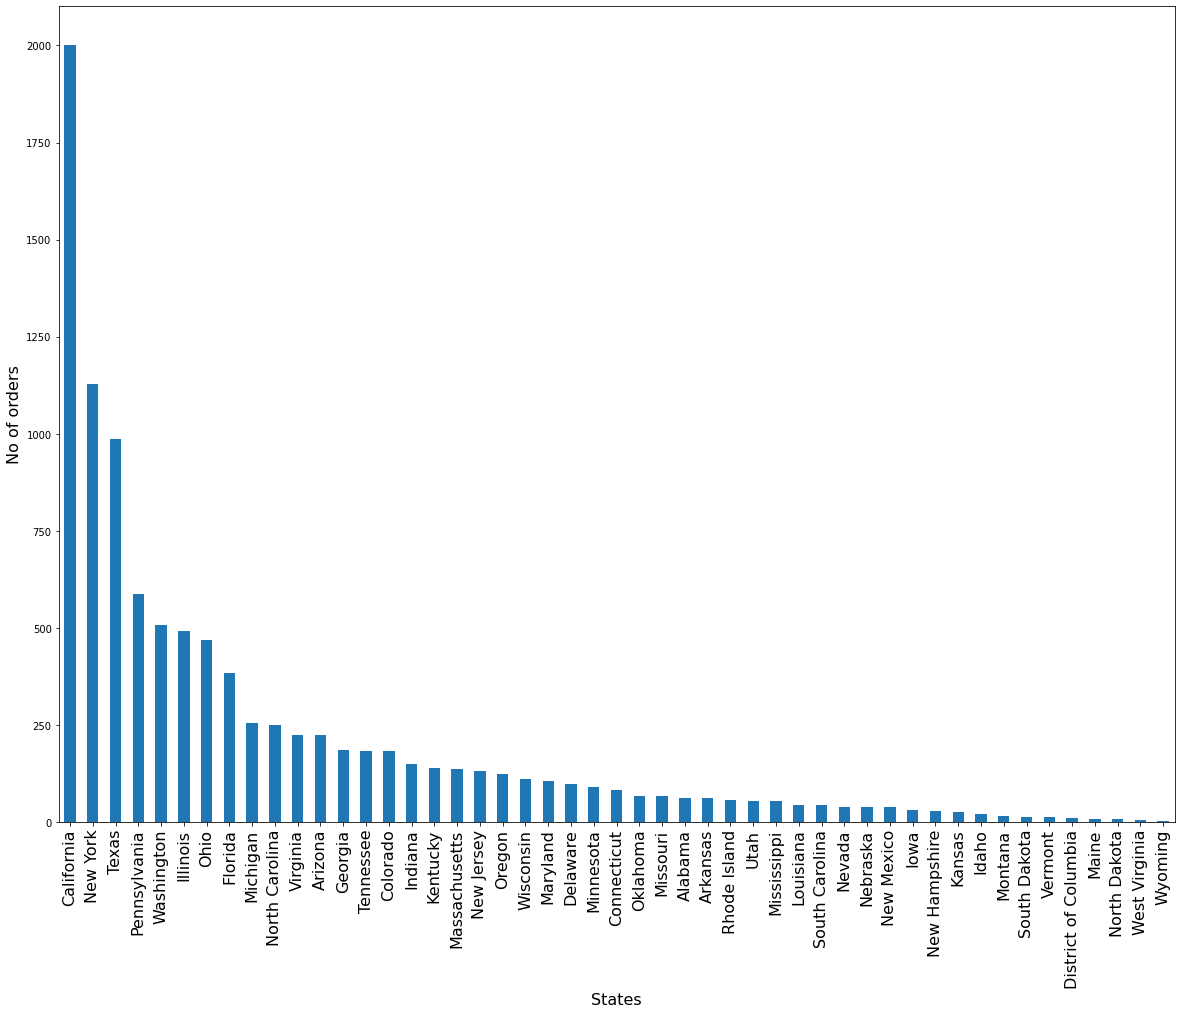

In [13]:
#Looking at total no orders from different states
plt.figure(figsize=(20,15))
df['State'].value_counts().plot.bar()
plt.xlabel("States",size=16)
plt.xticks(size=16)
plt.ylabel("No of orders",size=16)
plt.show()

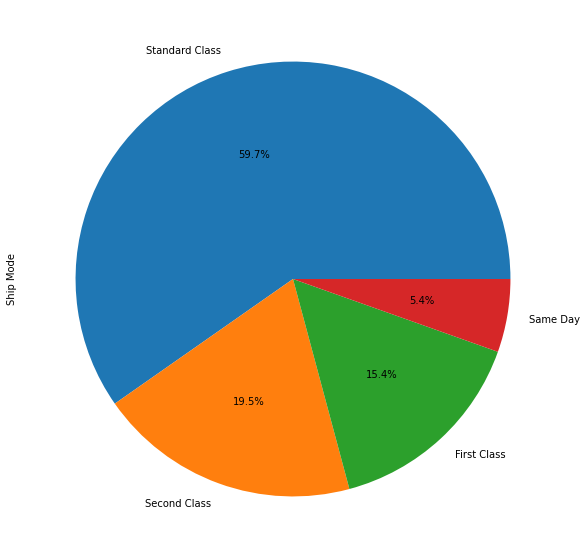

In [14]:
#Percentage of different shipping modes in our dataset 
plt.figure(figsize=(10,10))
df['Ship Mode'].value_counts().plot.pie(autopct="%1.1f%%")
plt.show()

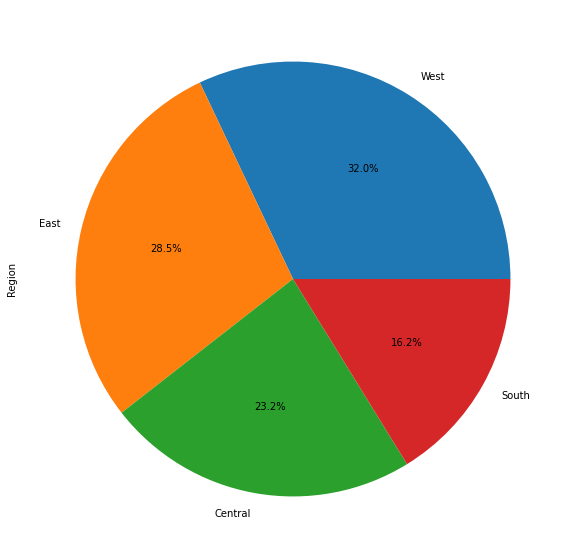

In [15]:
#looking at percentage of orders by region
plt.figure(figsize=(10,10))
df['Region'].value_counts().plot.pie(autopct="%1.1f%%")
plt.show()

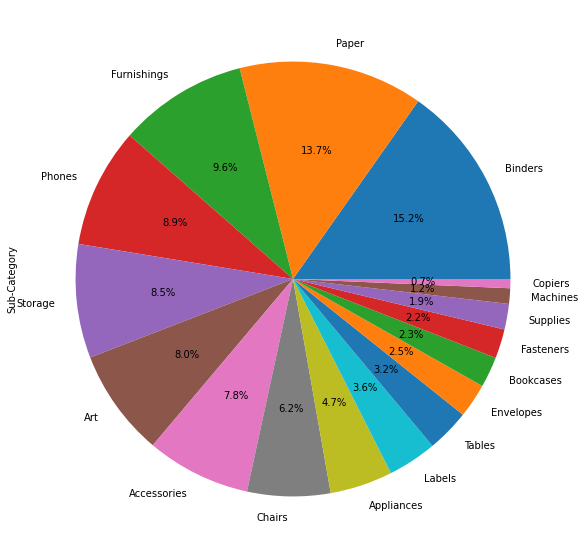

In [16]:
#percentage of orders of different sub categories
plt.figure(figsize=(10,10))
df['Sub-Category'].value_counts().plot.pie(autopct="%1.1f%%")
plt.show()

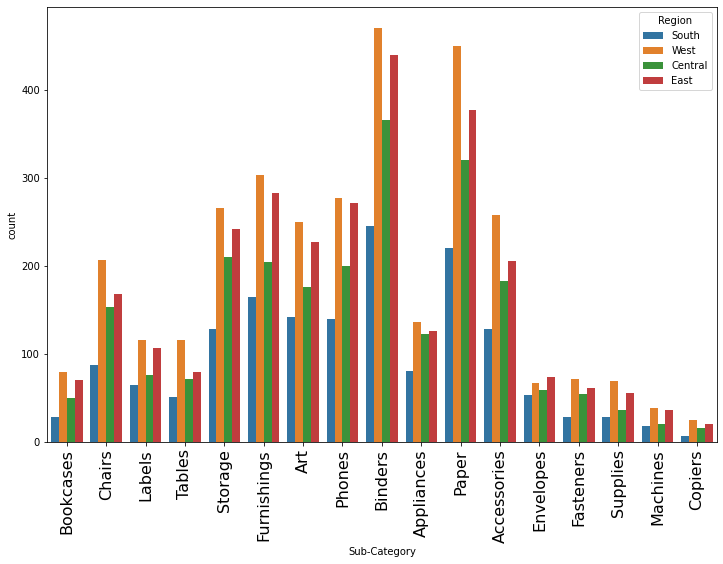

In [17]:
#Region wise different sub-categories order count
plt.figure(figsize=(12,8))
sbn.countplot(x="Sub-Category", hue="Region", data=df)
plt.xticks(rotation="vertical",size=16)
plt.show()

In [18]:
#Total sales sub-category wise
sales=pd.DataFrame(df.groupby('Sub-Category').sum()["Sales"])
print(sales)

                    Sales
Sub-Category             
Accessories   167380.3180
Appliances    107532.1610
Art            27118.7920
Binders       203412.7330
Bookcases     114879.9963
Chairs        328449.1030
Copiers       149528.0300
Envelopes      16476.4020
Fasteners       3024.2800
Furnishings    91705.1640
Labels         12486.3120
Machines      189238.6310
Paper          78479.2060
Phones        330007.0540
Storage       223843.6080
Supplies       46673.5380
Tables        206965.5320


### Visualising it on graph 

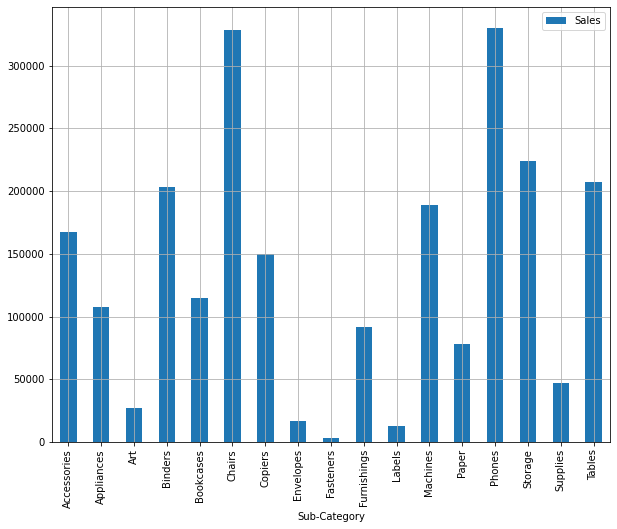

In [19]:
sales.plot.bar(figsize=(10,8),grid=True)
plt.show()

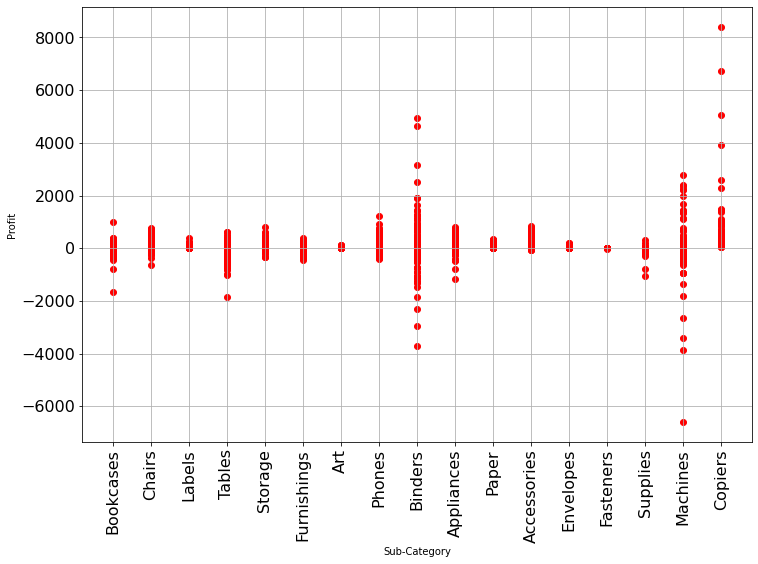

In [20]:
#Lets see how profits are distributed sub-category wise
plt.figure(figsize=(12,8))
plt.grid()
plt.scatter('Sub-Category',"Profit",c="r",data=df)
plt.xticks(rotation="vertical",size=16)
plt.xlabel("Sub-Category")
plt.yticks(size=16)
plt.ylabel("Profit")
plt.show()

In [21]:
#Total profit sub-category wise
profit=pd.DataFrame(df.groupby('Sub-Category').sum()["Profit"])
print(profit)

                  Profit
Sub-Category            
Accessories   41936.6357
Appliances    18138.0054
Art            6527.7870
Binders       30221.7633
Bookcases     -3472.5560
Chairs        26590.1663
Copiers       55617.8249
Envelopes      6964.1767
Fasteners       949.5182
Furnishings   13059.1436
Labels         5546.2540
Machines       3384.7569
Paper         34053.5693
Phones        44515.7306
Storage       21278.8264
Supplies      -1189.0995
Tables       -17725.4811


### Visualising our results

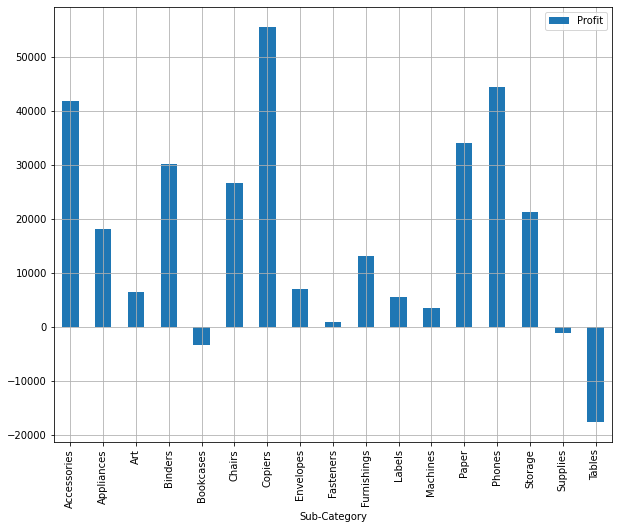

In [22]:
profit.plot.bar(figsize=(10,8),grid=True)
plt.show()

In [23]:
#top 10 sub-categories with most profit
profit=profit.sort_values('Profit',ascending=False)
print(profit[:10])

                  Profit
Sub-Category            
Copiers       55617.8249
Phones        44515.7306
Accessories   41936.6357
Paper         34053.5693
Binders       30221.7633
Chairs        26590.1663
Storage       21278.8264
Appliances    18138.0054
Furnishings   13059.1436
Envelopes      6964.1767


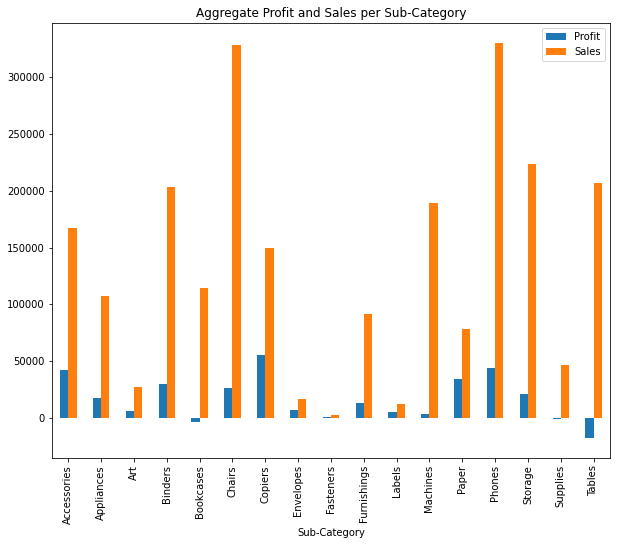

In [24]:
# Now comparing sales and profit side by side for a better understanding
df.groupby('Sub-Category')[['Profit','Sales']].sum().plot.bar(figsize=(10,8))
plt.title('Aggregate Profit and Sales per Sub-Category')
plt.show()

#### Lets look at states from where store is getting most of profit

In [25]:
#top 10 states giving most profit
state_profit=pd.DataFrame(df.groupby('State').sum()["Profit"])
print(state_profit.sort_values('Profit',ascending=False)[:10])

                Profit
State                 
California  76381.3871
New York    74038.5486
Washington  33402.6517
Michigan    24463.1876
Virginia    18597.9504
Indiana     18382.9363
Georgia     16250.0433
Kentucky    11199.6966
Minnesota   10823.1874
Delaware     9977.3748


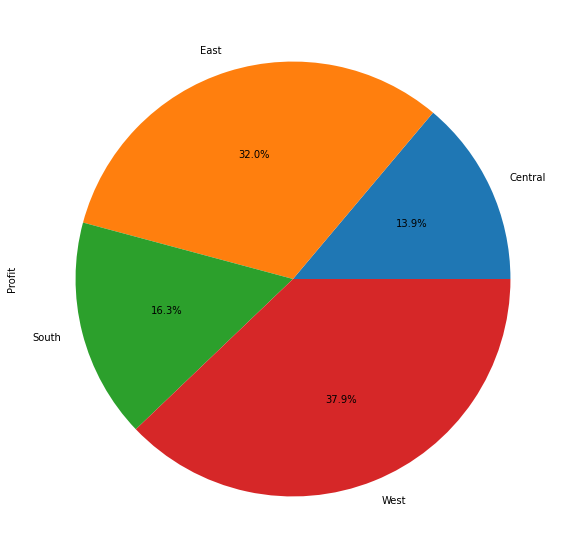

In [26]:
# Also lets look at our profit percentage region wise
plt.figure(figsize=(10,10))
df.groupby("Region").sum()["Profit"].plot.pie(autopct="%1.1f%%")
plt.show()

# Thankyou 
